In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error


In [3]:
ss=pd.read_csv("ml_house_data_set.csv")

In [4]:
ss

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,1982,1,1,1,0,591,627,none,0,200,False,False,True,True,562,Gregory Ford,253.0,Lake Jack,10825,88197.0
42699,1983,1,1,1,0,592,624,none,0,204,False,False,True,True,62028,Gregory Ford,3560.0,Lake Jack,10825,102690.0
42700,1983,1,1,1,0,594,618,none,0,197,False,False,True,True,62028,Gregory Ford,3931.0,Lake Jack,10825,98280.0
42701,1981,1,3,2,0,1398,1401,attached,401,0,False,False,True,True,7456,Garcia View,NaN,Lake Jack,10825,98278.0


In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

In [6]:
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.5300209687469986

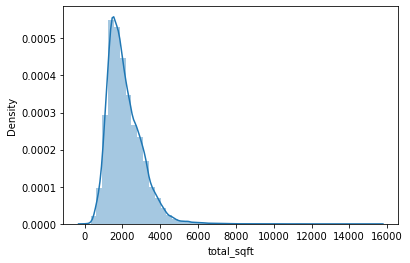

In [7]:
sns.distplot(ss["total_sqft"])
ss['total_sqft'].skew()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.2062188978583444

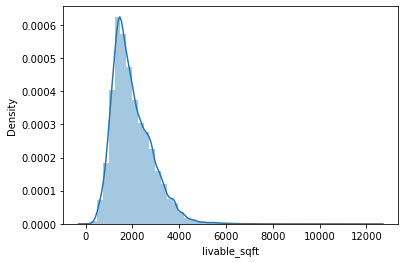

In [8]:
sns.distplot(ss["livable_sqft"])
ss['livable_sqft'].skew()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.7262503236443785

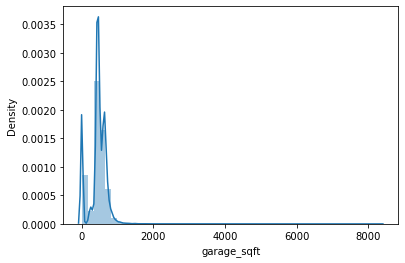

In [9]:
sns.distplot(ss["garage_sqft"])
ss['garage_sqft'].skew()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


9.970758215607686

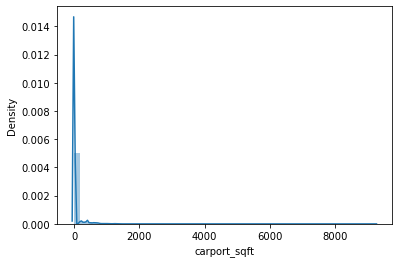

In [10]:
sns.distplot(ss["carport_sqft"])
ss['carport_sqft'].skew()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


12.065051245947682

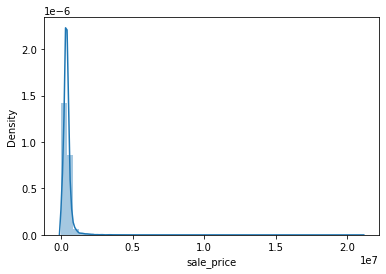

In [11]:
sns.distplot(ss["sale_price"])
ss['sale_price'].skew()

In [12]:
value =ss[['year_built','stories','num_bedrooms','full_bathrooms','half_bathrooms','livable_sqft','total_sqft','garage_sqft','carport_sqft','sale_price']]

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

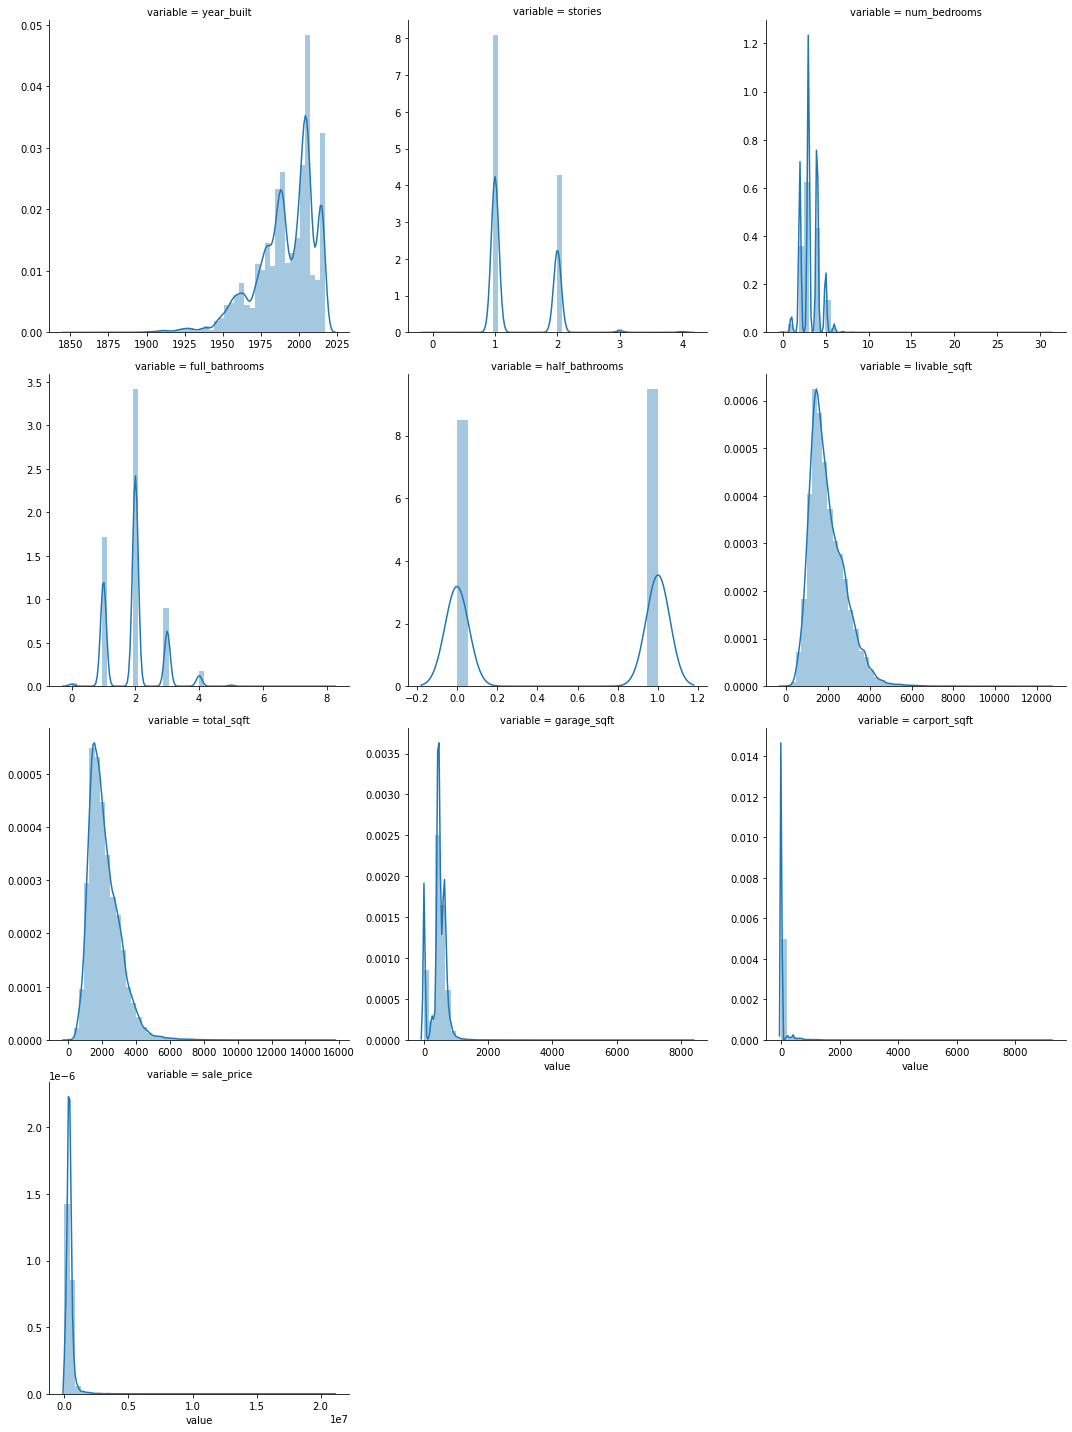

In [13]:
f = pd.melt(ss, value_vars=value)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

In [14]:
plt.rcParams["figure.figsize"] = (20,10)

<AxesSubplot:>

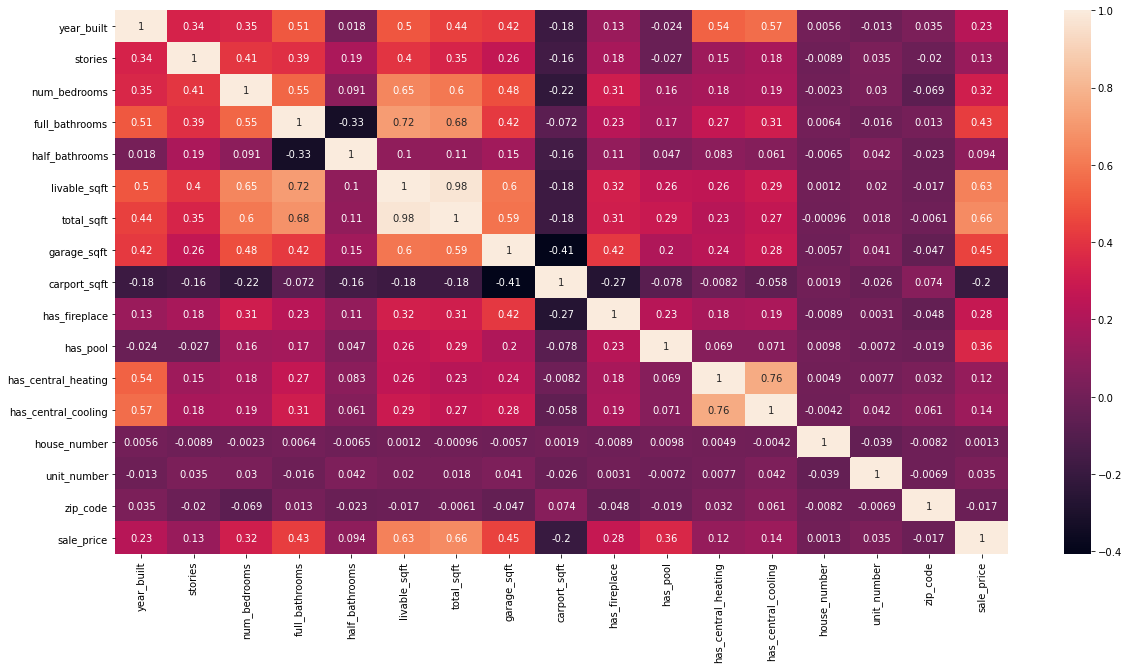

In [15]:
corr = ss.corr()
sns.heatmap(corr, annot=True)

In [16]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

In [17]:
ss['sale_price'].unique()

array([ 270897.,  302404., 2519996., ...,  729544.,  102690.,  186480.])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.07824603024501398

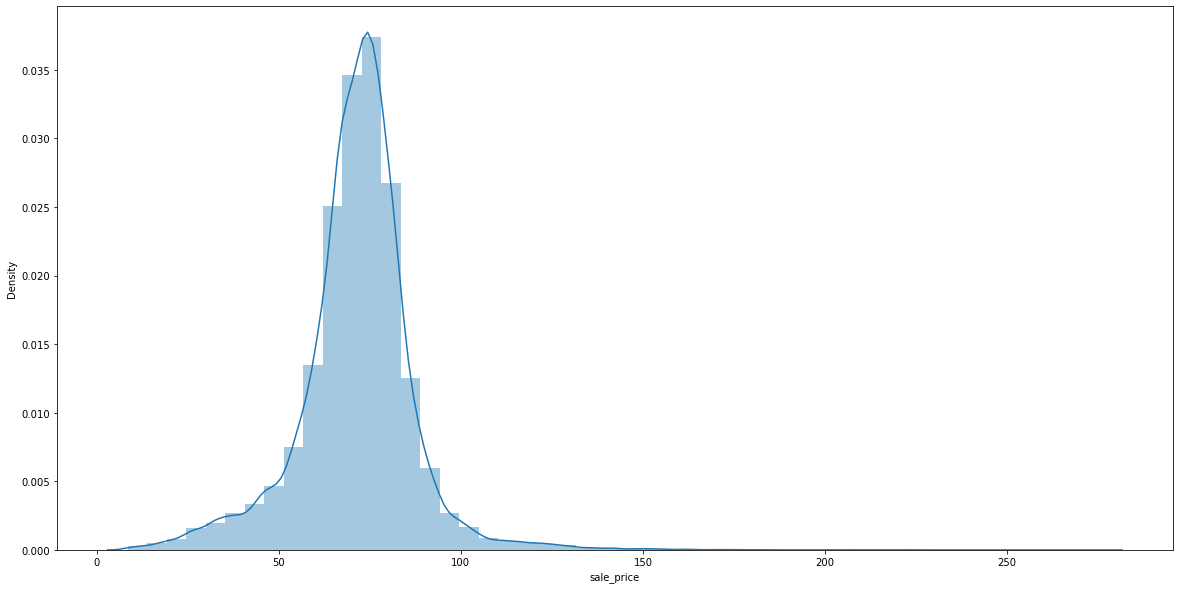

In [18]:
sns.distplot(np.cbrt(ss['sale_price']))
np.cbrt(ss['sale_price']).skew()

In [19]:
output=np.cbrt(ss['sale_price'])

In [20]:
ss['has_fireplace'].unique()

array([ True, False])

In [21]:
ss.loc[ss['has_fireplace']== True, 'has_fireplace'] = 1
ss.loc[ss['has_fireplace']== False, 'has_fireplace'] = 0

In [22]:
ss['has_fireplace'].unique()

array([1, 0], dtype=object)

In [23]:
ss.loc[ss['has_pool']== True, 'has_pool'] = 1
ss.loc[ss['has_pool']== False, 'has_pool'] = 0

In [24]:
ss.loc[ss['has_central_heating']== True, 'has_central_heating'] = 1
ss.loc[ss['has_central_heating']== False, 'has_central_heating'] = 0

In [25]:
ss.loc[ss['has_central_cooling']== True, 'has_central_cooling'] = 1
ss.loc[ss['has_central_cooling']== False, 'has_central_cooling'] = 0

In [26]:
ss['garage_type'].unique()

array(['attached', 'none', 'detached'], dtype=object)

In [27]:
ss.loc[ss['garage_type']== 'attached', 'garage_type'] = 1
ss.loc[ss['garage_type']== 'none', 'garage_type'] = 0
ss.loc[ss['garage_type']== 'detached', 'garage_type'] = 2

In [28]:
ss['city'].unique()

array(['Hallfort', 'Lake Christinaport', 'Morrisport', 'West Ann',
       'Richardport', 'Lewishaven', 'Clarkberg', 'Chadstad',
       'South Stevenfurt', 'Coletown', 'South Anthony', 'Jenniferberg',
       'North Erinville', 'Lake Jennifer', 'West Terrence',
       'Jeffreyhaven', 'Brownport', 'Scottberg', 'Lake Carolyn',
       'East Amychester', 'Joshuafurt', 'Davidtown',
       'Port Jonathanborough', 'Lake Jack', 'Port Andrealand',
       'Toddshire', 'Port Daniel', 'East Lucas', 'West Gregoryview',
       'Lake Dariusborough', 'West Lydia', 'Davidfort', 'Wendybury',
       'Amystad', 'Martinezfort', 'East Justin', 'West Brittanyview',
       'New Michele', 'East Janiceville', 'Port Adamtown', 'Justinport',
       'West Gerald', 'Fosterberg', 'Leahview', 'Rickytown', 'Julieberg',
       'New Robinton'], dtype=object)

In [29]:
ss.loc[ss['city']== 'Hallfort', 'city'] = 0
ss.loc[ss['city']== 'Lake Christinaport', 'city'] = 1
ss.loc[ss['city']== 'Morrisport', 'city'] = 2
ss.loc[ss['city']== 'West Ann', 'city'] = 3
ss.loc[ss['city']== 'Richardport', 'city'] = 4
ss.loc[ss['city']== 'Lewishaven', 'city'] = 5
ss.loc[ss['city']== 'Clarkberg', 'city'] = 6
ss.loc[ss['city']== 'Chadstad', 'city'] = 7
ss.loc[ss['city']== 'South Stevenfurt', 'city'] = 8
ss.loc[ss['city']== 'Coletown', 'city'] = 9
ss.loc[ss['city']== 'South Anthony', 'city'] = 10
ss.loc[ss['city']== 'Jenniferberg', 'city'] = 11
ss.loc[ss['city']== 'North Erinville', 'city'] = 12
ss.loc[ss['city']== 'Lake Jennifer', 'city'] = 13
ss.loc[ss['city']== 'West Terrence', 'city'] = 14
ss.loc[ss['city']== 'Jeffreyhaven', 'city'] = 15
ss.loc[ss['city']== 'Brownport', 'city'] = 16
ss.loc[ss['city']== 'Scottberg', 'city'] = 17
ss.loc[ss['city']== 'Lake Carolyn', 'city'] = 18
ss.loc[ss['city']== 'East Amychester', 'city'] = 19
ss.loc[ss['city']== 'Joshuafurt', 'city'] = 20
ss.loc[ss['city']== 'Davidtown', 'city'] = 21
ss.loc[ss['city']== 'Port Jonathanborough', 'city'] = 22
ss.loc[ss['city']== 'Lake Jack', 'city'] = 23
ss.loc[ss['city']== 'Port Andrealand', 'city'] = 24
ss.loc[ss['city']== 'Toddshire', 'city'] = 25
ss.loc[ss['city']== 'Port Daniel', 'city'] = 26
ss.loc[ss['city']== 'East Lucas', 'city'] = 27
ss.loc[ss['city']== 'West Gregoryview', 'city'] = 28
ss.loc[ss['city']== 'Lake Dariusborough', 'city'] = 29
ss.loc[ss['city']== 'West Lydia', 'city'] = 30
ss.loc[ss['city']== 'Davidfort', 'city'] = 31
ss.loc[ss['city']== 'Wendybury', 'city'] =32
ss.loc[ss['city']== 'Amystad', 'city'] = 33
ss.loc[ss['city']== 'Martinezfort', 'city'] = 34
ss.loc[ss['city']== 'East Justin', 'city'] = 35
ss.loc[ss['city']== 'West Brittanyview', 'city'] = 36
ss.loc[ss['city']== 'New Michele', 'city'] = 37
ss.loc[ss['city']== 'East Janiceville', 'city'] = 38
ss.loc[ss['city']== 'Port Adamtown', 'city'] = 39
ss.loc[ss['city']== 'Justinport', 'city'] = 40
ss.loc[ss['city']== 'West Gerald', 'city'] = 41
ss.loc[ss['city']== 'Fosterberg', 'city'] = 42
ss.loc[ss['city']== 'Leahview', 'city'] = 43
ss.loc[ss['city']== 'Rickytown', 'city'] = 44
ss.loc[ss['city']== 'Julieberg', 'city'] = 45
ss.loc[ss['city']== 'New Robinton', 'city'] = 46
 

In [30]:
ss['city'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=object)

In [31]:
Input =ss[['year_built','stories','num_bedrooms','full_bathrooms','half_bathrooms','livable_sqft','total_sqft','has_fireplace','has_pool','has_central_heating','has_central_cooling','garage_type','city']]

In [32]:
# Output = ss['sale_price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.3, random_state=0)

GradientBoostingRegressor

In [34]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=0
)

In [35]:
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=2000,
                          random_state=0)

In [37]:
model.score(X_train, y_train)

0.8806814868587441

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 3.0337


RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)

In [42]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [43]:
forest_model.score(X_train, y_train)

0.9731612276836769

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mse = mean_absolute_error(y_train, forest_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 1.4606


In [46]:
mse = mean_absolute_error(y_test, forest_model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 3.7406


In [47]:
import pickle

pickle.dump(forest_model,open('sales.pkl','wb'))
sales = pickle.load(open('sales.pkl','rb'))